# Loan Prediction Practice <a id=99></a>

1. [Problem Definition](#1)
2. [Data](#2)
3. [Evaluation](#3)
4. [Features](#4)
    - 4.1 [Loan Prediction Data Dictionary](#5)
5. [Preparation](#6)
    - 5.1 [Preparing the tools](#7)
    - 5.2 [Load Data](#8)
    - 5.3 [Data Understanding](#9)
    - 5.4 [Convert strings to Categories](#10)
    - 5.5 [Save Processed Data](#11)
    - 5.6 [Fill missing values](#12)
6. [Exploratory Data Analysis](#13)
    - 6.1 [Univariate Analysis](#14)
    - 6.2 [Bivariate Analysis](#15)
7. [Data Preprocessing](#16)
    - 7.1 [Conclusions from the EDA](#17)
    - 7.2 [Packages](#18)
    - 7.3 [Defining the features and target](#19)
    - 7.4 [Train and validation split](#20)
8. [Modeling](#21)
    - 8.1 [Model Choices](#22)
    - 8.2 [Model Comparison](#23)
9. [Hyperparameter tuning and cross-validation](#24)
    - 9.1 [Tuning KNeighborsClassifier by hand](#25)
    - 9.2 [Tuning models with with RandomizedSearchCV](#26)
    - 9.3 [Tuning a model with GridSearchCV](#27)
10. [Evaluation](#28)
    - 10.1 [Test Data](#29)
    - 10.2 [Convert strings to Categories](#30)
    - 10.3 [Fill missing values](#31)
    - 10.4 [Making submissions](#32)
11. [Feature importance](#33)

### 1. Problem Definition <a id=1></a>
[Back to top](#99)

Objective of the work is to automate the loan eligibility process based on customer detail provided while filling online application form.

### 2. Data <a id=2></a>
[Back to top](#99)

I have downloaded thid dataset from [Kaggle](https://www.kaggle.com/shaijudatascience/loan-prediction-practice-av-competition).

The dataset contains 13 attributes. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable** in our case Loan_Status.

The data repository contains two files one is *train_csv * to train the model and the other is *test.csv * to predict the outcome from the trained dateset.

### 3. Evaluation <a id=3></a>
[Back to top](#99)

> If we can reach 80% accuracy at predicting whether or not a a customer can be approved for loan during the proof of concept, we'll pursure this project.


### 4. Features <a id=4></a>
[Back to top](#99)

#### 4.1 Loan Prediction Data Dictionary <a id=5></a>

The following are the features we'll use to predict our target variable (heart disease or no heart disease):

* **1. Loan_ID** - Unique Loan ID 
* **2. Gender** - (1 = male; 0 = female) 
* **3. Married** - Applicant married(1 = yes; 0 = no)
* **4. Dependents** - Number of dependents
* **5. Education** - Application Education(Graduate / Under Graduate)
* **6. Self_Employed** - Self Employed(1 = yes; 0 = no)
* **7. ApplicantIncome** - Aplicant income
* **8. CoapplicantIncome** - Coapplicant income
* **9. Loan Amount** - Loan amount in thousands
* **10. Loan_Amount_Term** - Term of loan in months
* **11. Credit_History** - Credit history meets guidlines
* **12. Property_area** - Property Area(Urban / Semi Urban / Rural)
* **13. Loan_Status** - Loan approved(1 = yes; 0 = no)

### 5. Preparation <a id=6></a>
[Back to top](#99)

#### 5.1 Preparing the tools <a id=7></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### 5.2 Load Data <a id=8></a>

In [2]:
df = pd.read_csv("loan_prediction/train.csv")
test_df = pd.read_csv("loan_prediction/test.csv")

#### 5.3 Data Understanding <a id=9></a>

##### 5.3.1 Top 5 rows of our dataframe <a id=7></a>

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### 5.3.2 The shape of the data

In [4]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (614, 13)


##### 5.3.3 Check the number of unique values in each column

In [5]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["Unique Counter:"]).transpose()

,Unique Counter:
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


##### 5.3.5 Separating the columns in categorical and continuous

In [6]:
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
con_cols = ["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
target_col = ["Loan_Status"]
print("The categorial columns are : ", cat_cols)
print("The continuous columns are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial columns are :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
The continuous columns are :  ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
The target variable is :   ['Loan_Status']


##### 5.3.6 Summary statistics

In [7]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0


##### 5.3.7 Data types 

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

##### 5.3.8 Missing values

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### 5.3.9 Duplicates

In [10]:
duplicates_number = df.duplicated().sum()
print("The categorial columns are : ", duplicates_number)

The categorial columns are :  0


#### 5.4 Convert strings to Categories <a id=10></a>

##### 5.4.1 Check which columns contain strings

In [11]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


##### 5.4.2 Turn all of the string values into category values

In [12]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    category
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(8), float64(4), int64(1)
memory usage: 55.1 KB


All of our data is categorical and I can now turn the categories into numbers, however it's still missing values. Before I start filling missing values I will save processed data.

#### 5.5 Save Processed Data <a id=11></a>

In [14]:
df.to_csv("loan_prediction/cat_values.csv", index=False)

In [15]:
# Load data
df_cat = pd.read_csv("loan_prediction/cat_values.csv")

In [16]:
# Check number of missing values
df_cat.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 5.6 Fill missing values <a id=12></a>

##### 5.6.1 Filling numerical values first

###### 5.6.1.1 Check which columns are numerical

In [17]:
for label, content in df_cat.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


###### 5.6.1.2 Check for which numeric columns have null values


In [18]:
for label, content in df_cat.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LoanAmount
Loan_Amount_Term
Credit_History


###### 5.6.1.3 Check those columns unique values

In [19]:
df_cat.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [20]:
df_cat.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [21]:
df_cat.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

* We're going to fill LoanAmount with the median of that column. 
* Because the highest percent of people has a Loan Term Amount of 360 I will fill that column with that value.
* Credit_History column shows that most of the people had credits before so I will fill that column with 1.

###### 5.6.1.4 Fill numeric values

In [22]:
df_cat['LoanAmount'] = df_cat['LoanAmount'].fillna((df_cat['LoanAmount'].mean()))
df_cat['Loan_Amount_Term'] = df_cat['Loan_Amount_Term'].fillna(value = 360)
df_cat['Credit_History'] = df_cat['Credit_History'].fillna(value = 1)

###### 5.6.1.5 Lets check again if there's any null values

In [23]:
for label, content in df_cat.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

##### 5.6.2 Filling and turning categorical variables to numbers

###### 5.6.2.1 Check columns which are not numeric

In [24]:
for label, content in df_cat.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


###### 5.6.2.2 Turn all categorical columns to numeric

In [25]:
for label, content in df_cat.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_cat[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_cat[label] = pd.Categorical(content).codes+1

###### 5.6.2.3 Check our DataFrame data types

In [26]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   614 non-null    int16  
 1   Gender                    614 non-null    int8   
 2   Married                   614 non-null    int8   
 3   Dependents                614 non-null    int8   
 4   Education                 614 non-null    int8   
 5   Self_Employed             614 non-null    int8   
 6   ApplicantIncome           614 non-null    int64  
 7   CoapplicantIncome         614 non-null    float64
 8   LoanAmount                614 non-null    float64
 9   Loan_Amount_Term          614 non-null    float64
 10  Credit_History            614 non-null    float64
 11  Property_Area             614 non-null    int8   
 12  Loan_Status               614 non-null    int8   
 13  Loan_ID_is_missing        614 non-null    bool   
 14  Gender_is_

###### 5.6.2.4 Missing values

In [27]:
df_cat.isna().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Loan_ID_is_missing          0
Gender_is_missing           0
Married_is_missing          0
Dependents_is_missing       0
Education_is_missing        0
Self_Employed_is_missing    0
Property_Area_is_missing    0
Loan_Status_is_missing      0
dtype: int64

In [28]:
df_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,Loan_ID_is_missing,Gender_is_missing,Married_is_missing,Dependents_is_missing,Education_is_missing,Self_Employed_is_missing,Property_Area_is_missing,Loan_Status_is_missing
0,1,2,1,1,1,1,5849,0.0,146.412162,360.0,...,3,2,False,False,False,False,False,False,False,False
1,2,2,2,2,1,1,4583,1508.0,128.000000,360.0,...,1,1,False,False,False,False,False,False,False,False
2,3,2,2,1,1,2,3000,0.0,66.000000,360.0,...,3,2,False,False,False,False,False,False,False,False
3,4,2,2,1,2,1,2583,2358.0,120.000000,360.0,...,3,2,False,False,False,False,False,False,False,False
4,5,2,1,1,1,1,6000,0.0,141.000000,360.0,...,3,2,False,False,False,False,False,False,False,False


**CONCLUSION**: Now our Data is Clean We can do Further Analysis.

### 6. Exploratory Data Analysis <a id=13></a>
[back to top](#99)

#### 6.1 Univariate Analysis <a id=14></a>

##### 6.1.1 Count plot of categorical features

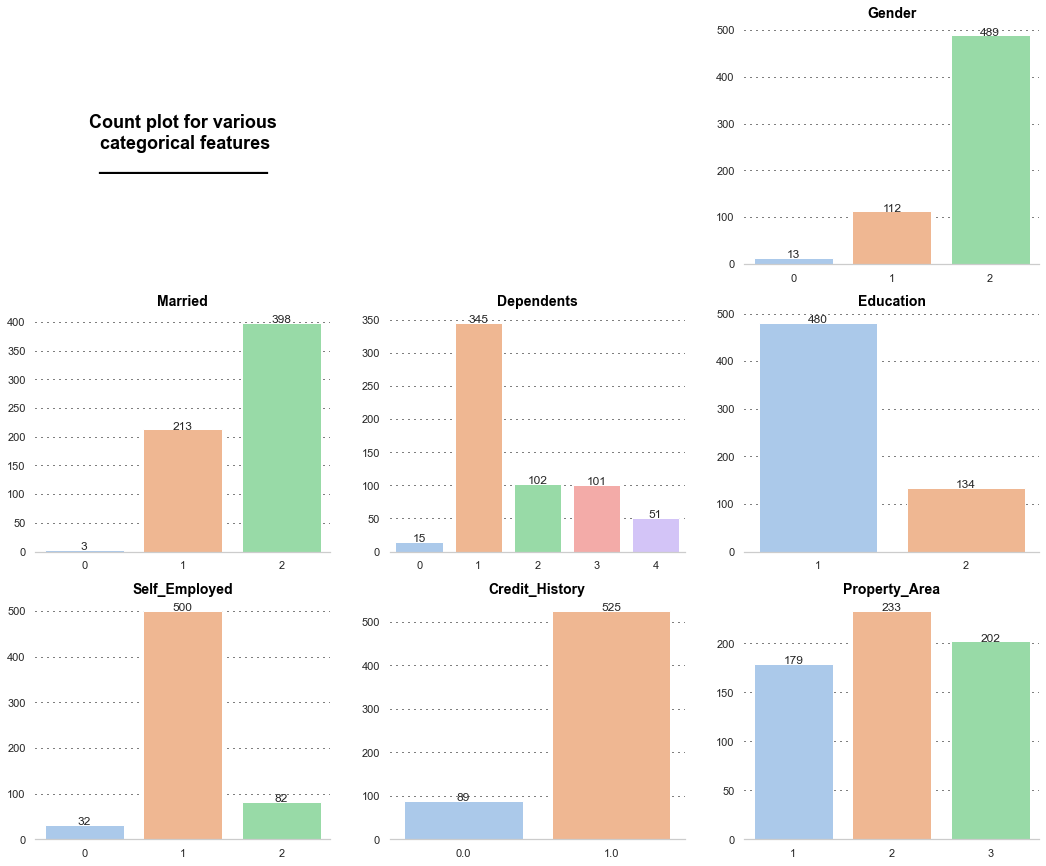

In [29]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3,
                                                                        ncols=3,
                                                                        figsize=(18, 15))

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False)
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         color="#000000")


ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(left=False, bottom=False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)

# Gender count
ax2.set_title('Gender', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df_cat,x='Gender')
ax2.set_xlabel("")
ax2.set_ylabel("")

# Married count
ax3.set_title('Married', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df_cat,x='Married')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Dependents count
ax4.set_title('Dependents', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df_cat,x='Dependents')
ax4.set_xlabel("")
ax4.set_ylabel("")

# Education count
ax5.set_title('Education', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df_cat,x='Education')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Self_Employed count
ax6.set_title('Self_Employed', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df_cat,x='Self_Employed')
ax6.set_xlabel("")
ax6.set_ylabel("")

# Credit_History count
ax7.set_title('Credit_History', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df_cat,x='Credit_History')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Property_Area count
ax8.set_title('Property_Area', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df_cat,x='Property_Area')
ax8.set_xlabel("")
ax8.set_ylabel("")

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            ax.text(_x, _y, p.get_height(), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)
show_values_on_bars(ax2)
show_values_on_bars(ax3)
show_values_on_bars(ax4)
show_values_on_bars(ax5)
show_values_on_bars(ax6)
show_values_on_bars(ax7)
show_values_on_bars(ax8)


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

##### 6.1.2 Boxen plot of continuous features

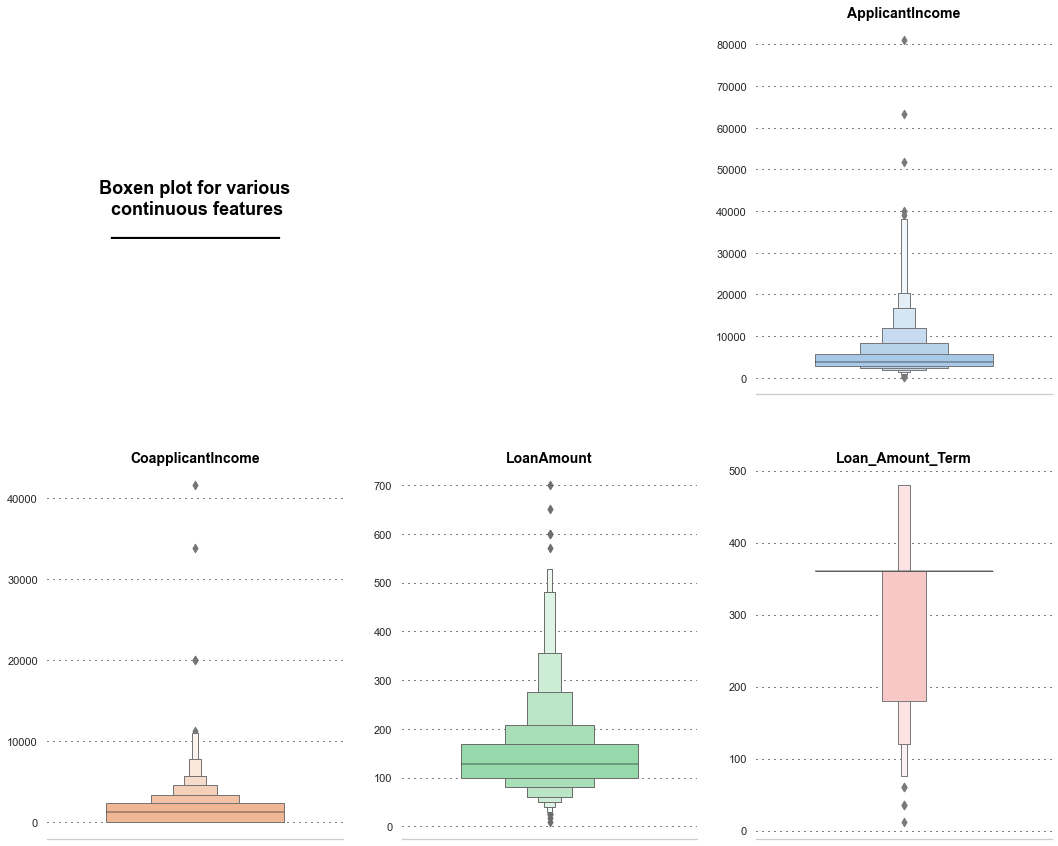

In [30]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2,
                                                       ncols=3,
                                                       figsize=(18, 15))

ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False)
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         color="#000000")

ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(left=False, bottom=False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)

# ApplicantIncome 
ax2.set_title('ApplicantIncome', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['ApplicantIncome'], palette=["#9ecaf1"], width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# CoapplicantIncome 
ax3.set_title('CoapplicantIncome', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['CoapplicantIncome'], palette=["#ffb386"], width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# LoanAmount 
ax4.set_title('LoanAmount', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['LoanAmount'], palette=["#8be4a6"], width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Loan_Amount_Term 
ax5.set_title('Loan_Amount_Term', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['Loan_Amount_Term'], palette=["#ff9f9c"], width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

##### 6.1.3 Count plot of target

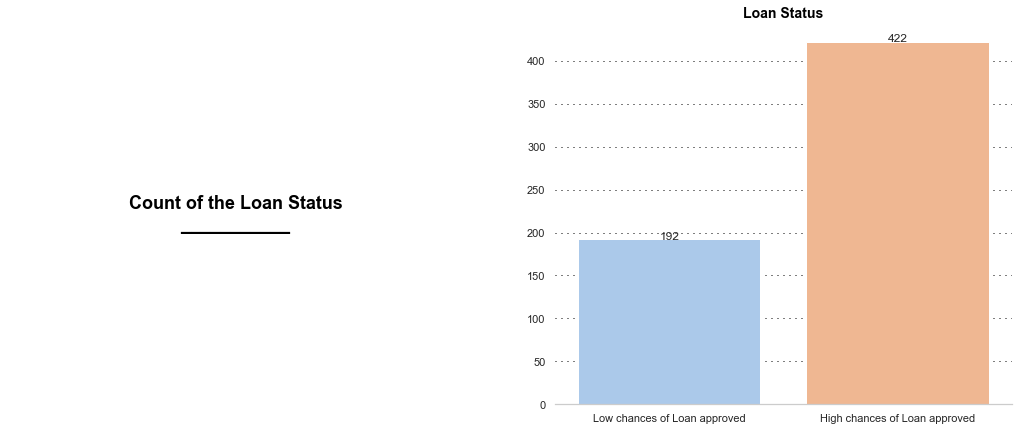

In [31]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

ax0.text(0.5,0.5,"Count of the Loan Status\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Loan Status
ax1.set_title('Loan Status', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df_cat, x = 'Loan_Status')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of Loan approved","High chances of Loan approved"])

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            ax.text(_x, _y, p.get_height(), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### 6.2 Bivariate Analysis <a id=15></a>

##### 6.2.1 Correlation matrix of continuous features

In [32]:
df_corr = df[con_cols].corr().transpose()
df_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878
LoanAmount,0.570909,0.188619,1.000000,0.039447
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000


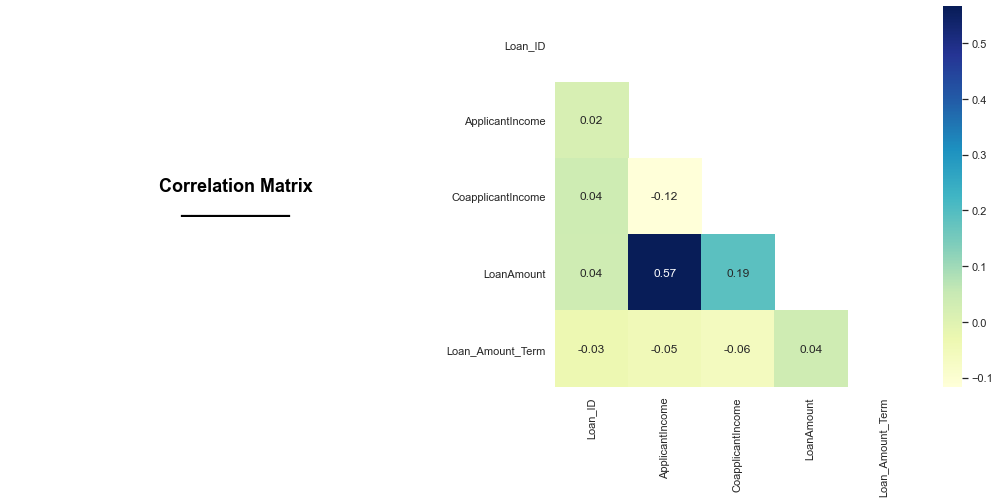

In [33]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

ax0.text(0.5,0.5,"Correlation Matrix\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
df_corr = df_cat[con_cols].corr().transpose()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, mask = mask, fmt=".2f", annot=True,cmap='YlGnBu')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

##### 6.2.2 Heatmap of DataFrame

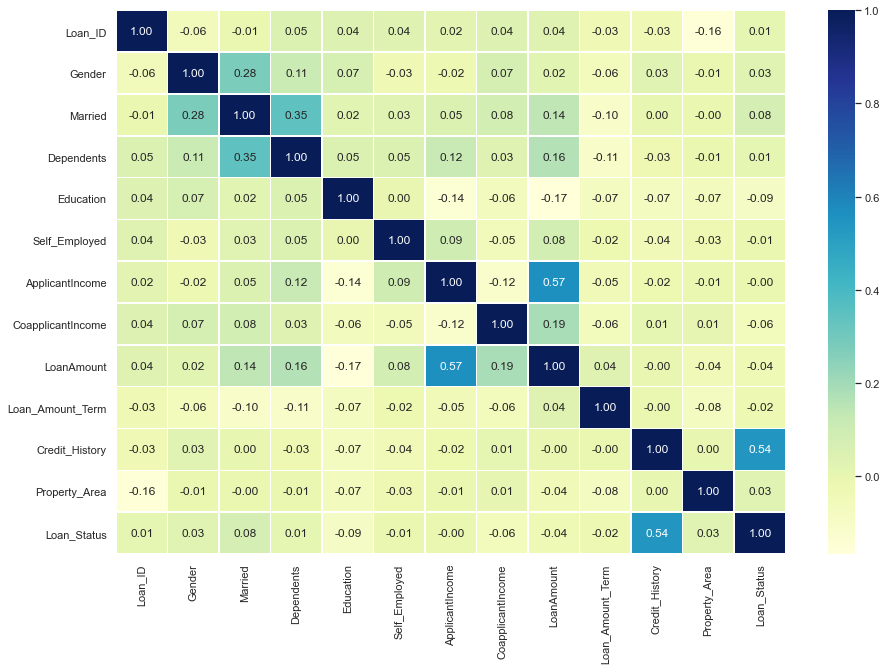

In [34]:
corr_matrix = df_cat.loc[:, :'Loan_Status'].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

#### 6.2.3 Distribution of continuous features according to Loan_Status variable

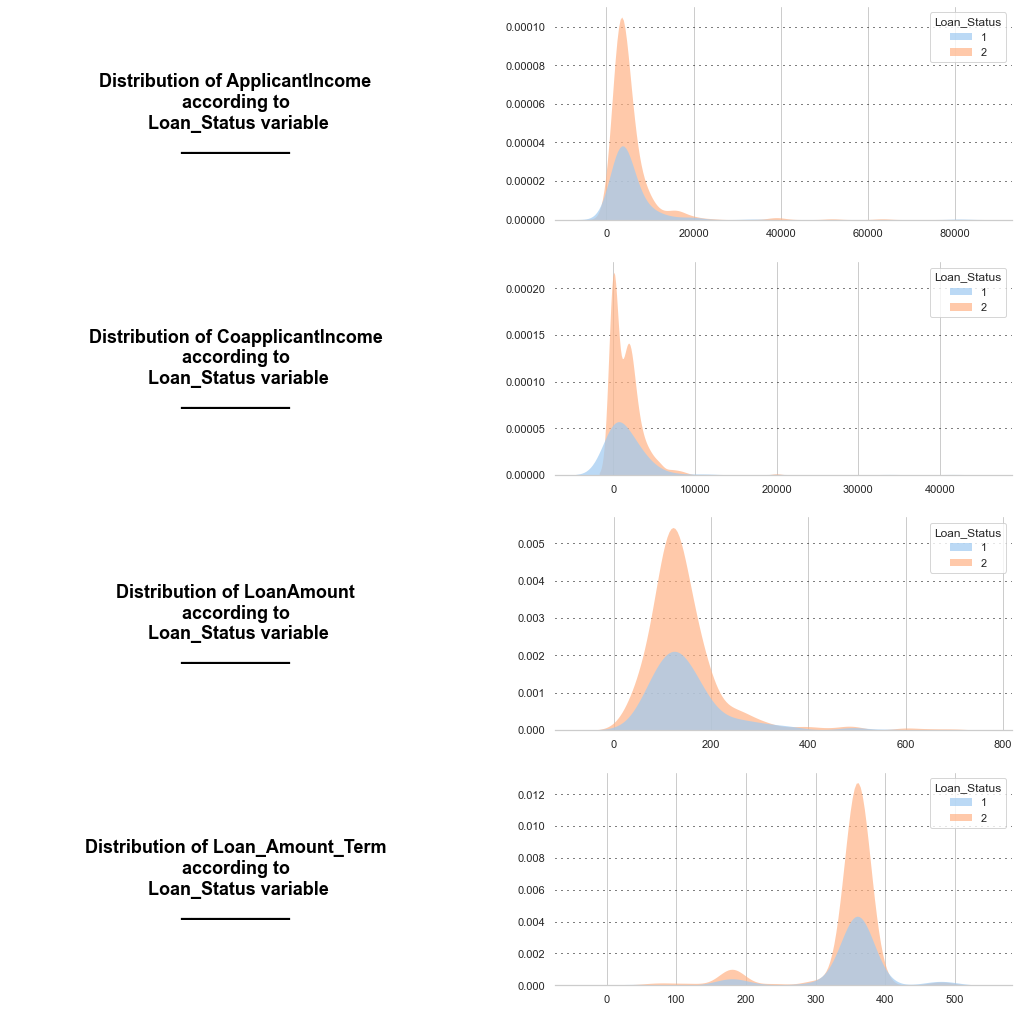

In [35]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(nrows=4,
                                                                     ncols=2,
                                                                     figsize=(18, 18))
# ApplicantIncome title
ax0.text(0.5,0.5,"Distribution of ApplicantIncome\naccording to\n Loan_Status variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False)
ax0.tick_params(left=False, bottom=False)

# ApplicantIncome
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df_cat, x='ApplicantIncome',hue="Loan_Status", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# CoapplicantIncome title
ax2.text(0.5,0.5,"Distribution of CoapplicantIncome\naccording to\n Loan_Status variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(False)
ax2.tick_params(left=False, bottom=False)

# CoapplicantIncome
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df_cat, x='CoapplicantIncome',hue="Loan_Status", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# LoanAmount title
ax4.text(0.5,0.5,"Distribution of LoanAmount\naccording to\n Loan_Status variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.grid(False)
ax4.tick_params(left=False, bottom=False)

# LoanAmount
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df_cat, x='LoanAmount',hue="Loan_Status", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Loan_Amount_Term title
ax6.text(0.5,0.5,"Distribution of Loan_Amount_Term\naccording to\n Loan_Status variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.grid(False)
ax6.tick_params(left=False, bottom=False)

# Loan_Amount_Term
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df_cat, x='Loan_Amount_Term',hue="Loan_Status", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)

### 7. Data Preprocessing <a id=16></a>
[Back to top](#99)

#### 7.1 Conclusions from the EDA <a id=17></a>

1. There are no NaN values in the data.
2. The data consists of number of Males 4x more then Females.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. The scatterplot heatmap matrix suggests that there might be some correlation between `Loan Status` and `Credit History`.

#### 7.2 Packages <a id=18></a>

In [36]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

#### 7.3 Defining the features and target <a id=19></a>

In [37]:
df_true = df_cat.loc[:, :'Property_Area']
X = df_true
y = df_cat['Loan_Status'].values

In [38]:
y

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1,

In [39]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,1,1,1,1,5849,0.0,146.412162,360.0,1.0,3
1,2,2,2,2,1,1,4583,1508.0,128.000000,360.0,1.0,1
2,3,2,2,1,1,2,3000,0.0,66.000000,360.0,1.0,3
3,4,2,2,1,2,1,2583,2358.0,120.000000,360.0,1.0,3
4,5,2,1,1,1,1,6000,0.0,141.000000,360.0,1.0,3


#### 7.4 Train and validation split <a id=20></a>

In [40]:
# Random seed for reproducibility
np.random.seed(10)

# Split into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

print("The shape of X_train is:", X_train.shape)
print("The shape of X_val is:", X_val.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_val is:", y_val.shape)

The shape of X_train is: (491, 12)
The shape of X_val is: (123, 12)
The shape of y_train is: (491,)
The shape of y_val is: (123,)


### 8. Modeling <a id=21></a>
[back to top](#99)

#### 8.1 Model choices <a id=22></a>

Now because I have got the data prepared, I can start to fit models. I will be using the following and comparing their results.

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`
4. Decision Tree - `DecisionTreeClassifier()`
5. SVC - `SVC()`

In [41]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   614 non-null    int16  
 1   Gender                    614 non-null    int8   
 2   Married                   614 non-null    int8   
 3   Dependents                614 non-null    int8   
 4   Education                 614 non-null    int8   
 5   Self_Employed             614 non-null    int8   
 6   ApplicantIncome           614 non-null    int64  
 7   CoapplicantIncome         614 non-null    float64
 8   LoanAmount                614 non-null    float64
 9   Loan_Amount_Term          614 non-null    float64
 10  Credit_History            614 non-null    float64
 11  Property_Area             614 non-null    int8   
 12  Loan_Status               614 non-null    int8   
 13  Loan_ID_is_missing        614 non-null    bool   
 14  Gender_is_

In [42]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVC": SVC()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(10)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        y_pred=model.predict(X_val)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = metrics.accuracy_score(y_val,y_pred)
    return model_scores

In [43]:
model_pred = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)
model_pred

{'KNN': 0.6097560975609756,
 'Logistic Regression': 0.7967479674796748,
 'Random Forest': 0.7560975609756098,
 'Decision Tree': 0.7073170731707317,
 'SVC': 0.7073170731707317}

#### 8.2 Model Comparison <a id=23></a>

In [44]:
model_compare = pd.DataFrame(model_pred, index=['Accuracy'])
model_compare

,KNN,Logistic Regression,Random Forest,Decision Tree,SVC
Accuracy,0.609756,0.796748,0.756098,0.707317,0.707317


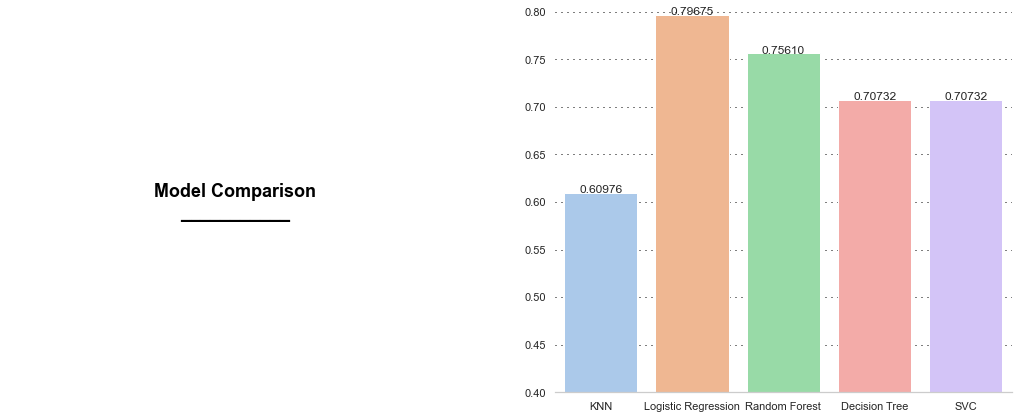

In [45]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

# Title of the plot
ax0.text(0.5,0.5,"Model Comparison\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.set(ylim=(0.4, 0.8))
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(data=model_compare)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.5f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

### 9. Hyperparameter tuning and cross-validation <a id=24></a>
[back to top](#99)

To test different hyperparameters, we could use a **validation set** but since I don't have much data, I will use **cross-validation**.

#### 9.1 Tuning KNeighborsClassifier by hand <a id=25></a>

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (`n_neigbors=5`).

In this case I want to check is there a value between 1 and 20 for number of neighbours I can use to get better KNN score result.

In [46]:
# Create a list of train scores
train_scores = []

# Create a list of val scores
val_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the val scores
    val_scores.append(knn.score(X_val, y_val))

# Calculate max score
max_score = round(max(val_scores)*100, 2)

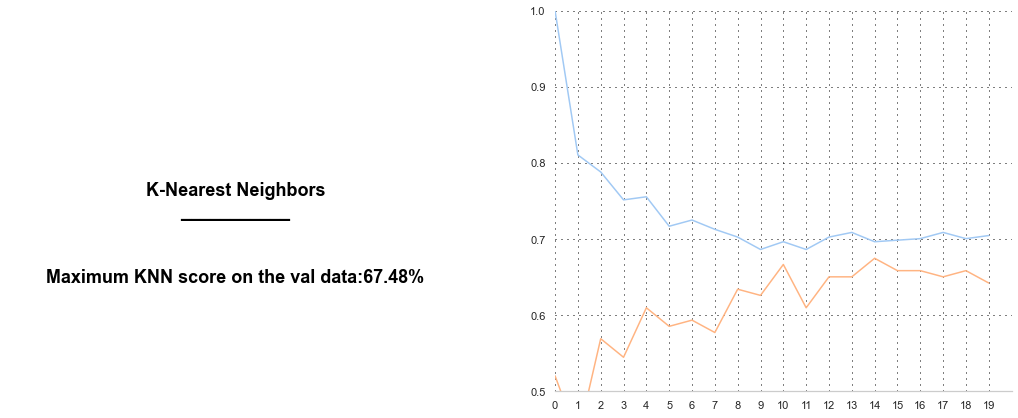

In [47]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

ax0.text(0.5,0.5,"K-Nearest Neighbors\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

max_text = "Maximum KNN score on the val data:"
max_perc = "%"
completeText = [max_text, max_score, max_perc]

textIn = ''.join(map(str, completeText))

ax0.text(0.5, 0.3, textIn ,
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18,
         fontweight='bold',
         color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

ax1.set(ylim=(0.5, 1))
ax1.set(xlim=(0, 20))
ax1.grid(False)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.grid(color='#000000', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
sns.lineplot(data=train_scores)
sns.lineplot(data=val_scores)
ax1.set_xlabel("")
ax1.set_ylabel("")
plt.xticks(np.arange(0, 20, step=1))

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

Looking at the graph,`n_neighbors = 14` seems best.

Even knowing this, the `KNN`'s model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, I will discard `KNN` and focus on the other two.

We've tuned `KNN` by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

#### 9.2 Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)<a id=26></a>

In [48]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                #"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
                "solver": ['liblinear']}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [49]:
# Setup random seed
np.random.seed(10)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=20,
                                n_iter=1000,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.3s finished


In [50]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [51]:
# Evaluate the randomized search for LogisticRegression
print("Accuracy for LogisticRegression model using best RandomizedSearch parameters is:",rs_log_reg.score(X_val, y_val))

Accuracy for LogisticRegression model using best RandomizedSearch parameters is: 0.7967479674796748


Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [52]:
# Setup random seed
np.random.seed(10)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


In [53]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [54]:
# Evaluate the randomized search for RandomForest
print("Accuracy for RandomForest model using best RandomizedSearch parameters is:",rs_rf.score(X_val, y_val))

Accuracy for RandomForest model using best RandomizedSearch parameters is: 0.7967479674796748


#### 9.3 Tuning a models with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) <a id=27></a>

In [55]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}

# Setup grid hyperparameter search
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=20,
                                verbose=True,
                                n_jobs=-1)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.7s finished


In [56]:
#Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [57]:
# Evaluate the grid search for LogisticRegression
gs_log_reg.score(X_val, y_val)

0.7967479674796748

In [58]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(450, 550, 1),
           "max_depth": [5],
           "min_samples_split": [8],
           "min_samples_leaf": [1]}

# Setup grid hyperparameter search 
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.6min finished


In [59]:
# Check the best parameters
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 454}

In [60]:
# Evaluate the grid search for RandomForest
gs_rf.score(X_val, y_val)

0.7967479674796748

### 10. Evaluation <a id=28></a>
[back to top](#99)

#### 10.1 Test data <a id=29></a>

###### 10.1.1 Top 10 rows of our test data

In [61]:
test_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


##### 10.1.2 The shape of the data

In [62]:
print("The shape of the test dataset is : ", test_df.shape)

The shape of the test dataset is :  (367, 12)


##### 10.1.3 Missing values

In [63]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##### 10.1.4 Data types

In [64]:
test_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

#### 10.2 Convert strings to Categories <a id=30></a>

##### 10.2.1 Check which columns contain strings

In [65]:
for label, content in test_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area


##### 10.2.2 Turn all of the string values into category values

In [66]:
for label, content in test_df.items():
    if pd.api.types.is_string_dtype(content):
        test_df[label] = content.astype("category").cat.as_ordered()

In [67]:
test_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    category
 1   Gender             356 non-null    category
 2   Married            367 non-null    category
 3   Dependents         357 non-null    category
 4   Education          367 non-null    category
 5   Self_Employed      344 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         362 non-null    float64 
 9   Loan_Amount_Term   361 non-null    float64 
 10  Credit_History     338 non-null    float64 
 11  Property_Area      367 non-null    category
dtypes: category(7), float64(3), int64(2)
memory usage: 30.9 KB


#### 10.3 Fill missing values <a id=31></a>

##### 10.3.1 Fill numerical values

###### 10.3.1.1 Check which columns are numeric

In [68]:
for label, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


###### 10.3.1.2 Check for which numeric columns have null values

In [69]:
for label, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LoanAmount
Loan_Amount_Term
Credit_History


* We're going to fill LoanAmount with the median of that column. 
* Because the highest percent of people has a Loan Term Amount of 360 I will fill that column with that value.
* Credit_History column shows that most of the people had credits before so I will fill that column with 1.

###### 10.3.1.3 Fill numeric values

In [70]:
test_df['LoanAmount'] = test_df['LoanAmount'].fillna((test_df['LoanAmount'].mean()))
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(value = 360)
test_df['Credit_History'] = test_df['Credit_History'].fillna(value = 1)

###### 10.3.1.4 Check again if there is any null values

In [71]:
for label, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

##### 10.3.2 Filling and turning categorical variables to numbers

###### 10.3.2.1 Check columns which are not numeric

In [72]:
for label, content in test_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area


###### 10.3.2.2 Turn all categorical columns to numeric

In [73]:
for label, content in test_df.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        test_df[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        test_df[label] = pd.Categorical(content).codes+1

###### 10.3.2.3 Check our DataFrame data types

In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   367 non-null    int16  
 1   Gender                    367 non-null    int8   
 2   Married                   367 non-null    int8   
 3   Dependents                367 non-null    int8   
 4   Education                 367 non-null    int8   
 5   Self_Employed             367 non-null    int8   
 6   ApplicantIncome           367 non-null    int64  
 7   CoapplicantIncome         367 non-null    int64  
 8   LoanAmount                367 non-null    float64
 9   Loan_Amount_Term          367 non-null    float64
 10  Credit_History            367 non-null    float64
 11  Property_Area             367 non-null    int8   
 12  Loan_ID_is_missing        367 non-null    bool   
 13  Gender_is_missing         367 non-null    bool   
 14  Married_is

###### 10.3.2.4 Missing values

In [75]:
test_df.isna().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_ID_is_missing          0
Gender_is_missing           0
Married_is_missing          0
Dependents_is_missing       0
Education_is_missing        0
Self_Employed_is_missing    0
Property_Area_is_missing    0
dtype: int64

In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   367 non-null    int16  
 1   Gender                    367 non-null    int8   
 2   Married                   367 non-null    int8   
 3   Dependents                367 non-null    int8   
 4   Education                 367 non-null    int8   
 5   Self_Employed             367 non-null    int8   
 6   ApplicantIncome           367 non-null    int64  
 7   CoapplicantIncome         367 non-null    int64  
 8   LoanAmount                367 non-null    float64
 9   Loan_Amount_Term          367 non-null    float64
 10  Credit_History            367 non-null    float64
 11  Property_Area             367 non-null    int8   
 12  Loan_ID_is_missing        367 non-null    bool   
 13  Gender_is_missing         367 non-null    bool   
 14  Married_is

In [77]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_ID_is_missing,Gender_is_missing,Married_is_missing,Dependents_is_missing,Education_is_missing,Self_Employed_is_missing,Property_Area_is_missing
0,1,2,2,1,1,1,5720,0,110.0,360.0,1.0,3,False,False,False,False,False,False,False
1,2,2,2,2,1,1,3076,1500,126.0,360.0,1.0,3,False,False,False,False,False,False,False
2,3,2,2,3,1,1,5000,1800,208.0,360.0,1.0,3,False,False,False,False,False,False,False
3,4,2,2,3,1,1,2340,2546,100.0,360.0,1.0,3,False,False,False,False,False,False,False
4,5,2,1,1,2,1,3276,0,78.0,360.0,1.0,3,False,False,False,False,False,False,False


#### 10.4 Making submissions <a id=32></a>

##### 10.4.1 Splitting data

In [78]:
df_test_true = test_df.loc[:, :'Property_Area']
loanID= df_test_true['Loan_ID']
testing_df=df_test_true

##### 10.4.2 The shape of the data

In [79]:
print("The shape of df_test_true is:", df_test_true.shape)
print("The shape of testing_df is:", testing_df.shape)

The shape of df_test_true is: (367, 12)
The shape of testing_df is: (367, 12)


##### 10.4.3 Making predictions using test data

In [80]:
y_pred_t=gs_log_reg.predict(testing_df)
y_final=[]
for y in y_pred_t:
    if y==2:
        y_final.append("Y")
    elif y==1:
        y_final.append("N")
y_best=np.array(y_final)
type(y_best)

numpy.ndarray

##### 10.4.4 Saving predictions in required format

In [81]:
submission = pd.DataFrame({
        "Loan_ID": loanID,
        "Loan_Status": y_best
    })
submission.head(10)

,Loan_ID,Loan_Status
0,1,Y
1,2,Y
2,3,Y
3,4,Y
4,5,Y
5,6,Y
6,7,Y
7,8,N
8,9,Y
9,10,Y


##### 10.4.5 Exporting predictions to csv file

In [82]:
submission.to_csv('submission.csv', index=False)

### 11. Feature importance <a id=33></a>
[back to top](#99)

In [83]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 454}

In [84]:
clf = gs_rf = RandomForestClassifier(max_depth = 5,
                                     min_samples_leaf = 1,
                                     min_samples_split = 8,
                                     n_estimators = 454)

In [85]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [86]:
# Check feature importances
clf.feature_importances_

array([0.08456769, 0.01163333, 0.01287012, 0.02298749, 0.01519614,
       0.00883503, 0.08166487, 0.07185438, 0.07469486, 0.04466923,
       0.52084163, 0.05018522])

In [87]:
feat_importances_s = pd.Series(clf.feature_importances_, index=X.columns)

In [88]:
feat_importances_df = feat_importances_s.to_frame('value').T
feat_importances_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
value,0.084568,0.011633,0.01287,0.022987,0.015196,0.008835,0.081665,0.071854,0.074695,0.044669,0.520842,0.050185


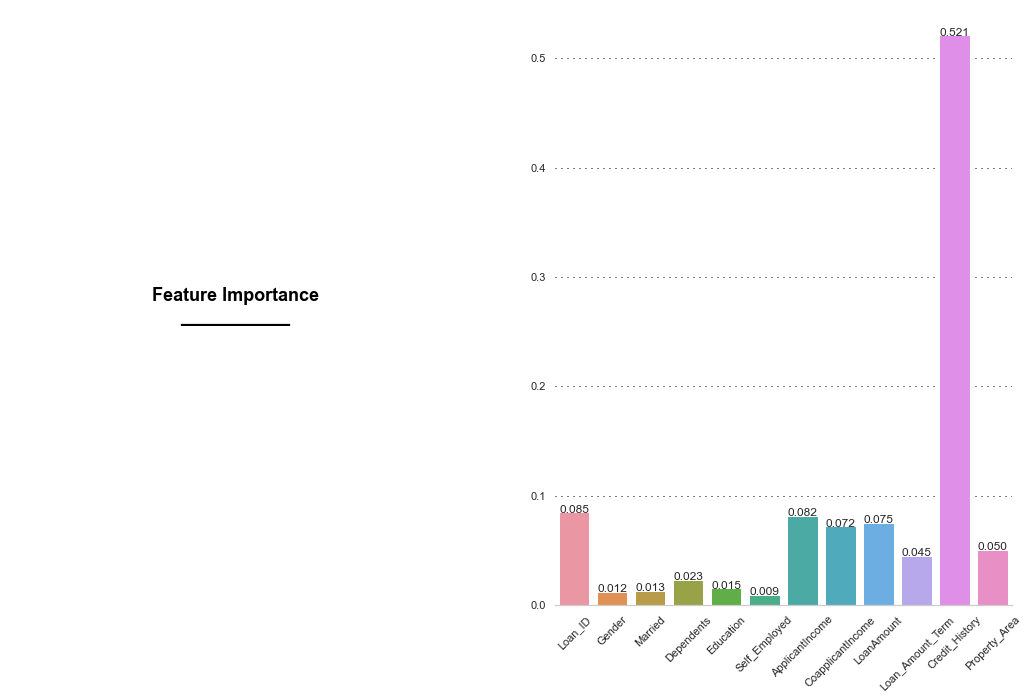

In [89]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 11))

# Title of the plot
ax0.text(0.5,0.5,"Feature Importance\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
#ax1.set(ylim=(0, 0.2))
plt.xticks(rotation=45)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(data=feat_importances_df)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.3f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

<h2 align="center">Thank you for reading this work!<br> Any feedback on this work would be very grateful.<br> If you liked this notebook please upvote.</h2>
